# NHANES Hybrid approach of 3 Random Forest and 2 ANN models passed into an ANN model using SMOTE technique.

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set directory path
import os
os.chdir("/content/drive/My Drive/COMP-5800-YDK-2020_Group1")

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import keras
import tensorflow as tf
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU
from keras.layers.normalization import BatchNormalization

In [ ]:
demoData = pd.read_csv('ImputedDataset/DemographicsData.csv')
dietData = pd.read_csv('ImputedDataset/DietaryData.csv')
examData = pd.read_csv('ImputedDataset/ExaminationData.csv')
labData = pd.read_csv('ImputedDataset/LaboratoryData.csv')
hypertensionData = pd.read_csv('ImputedDataset/HypertensionData.csv')

In [ ]:
demoData.shape

(8366, 30)

In [ ]:
dietData.shape

(8366, 44)

In [ ]:
examData.shape

(8366, 138)

In [ ]:
labData.shape

(8366, 190)

In [ ]:
hypertensionData.shape

(8366, 666)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
y = hypertensionData['Target']

## Train Test split after oversampling the data using SMOTE

In [ ]:
oversample = SMOTE(random_state = 42)

In [ ]:
demoX_train, demoX_test, demoY_train, demoY_test = train_test_split(demoData, y, test_size=0.33, random_state=42)

In [ ]:
demoX_train, demoY_train = oversample.fit_resample(demoX_train, demoY_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
demoX_train = pd.DataFrame(demoX_train)

In [ ]:
demoX_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,96077.000000,10.0,2.0,1.000000,80.000000,3.000000,3.000000,1.0,1.000000,1.000000,2.0,2.0,1.000000,2.0,2.0,3.000000,1.000000,5.397605e-79,5.397605e-79,2.000000e+00,1.000000,4.000000,1.000000,2.000000,8577.381557,10416.300411,1.000000,134.000000,99.000000,99.000000
1,101426.000000,10.0,2.0,2.000000,41.000000,4.000000,4.000000,1.0,1.000000,1.000000,2.0,2.0,1.000000,2.0,2.0,2.000000,2.000000,5.397605e-79,1.000000e+00,5.397605e-79,2.000000,3.000000,2.000000,2.000000,20400.322927,21250.863885,2.000000,142.000000,6.000000,6.000000
2,102724.000000,10.0,2.0,1.000000,43.000000,1.000000,1.000000,2.0,2.000000,2.000000,2.0,2.0,2.000000,2.0,2.0,1.000000,1.000000,5.397605e-79,5.397605e-79,5.397605e-79,1.000000,3.000000,1.000000,2.000000,24113.349373,24900.237591,2.000000,147.000000,6.000000,6.000000
3,95989.000000,10.0,2.0,2.000000,13.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,2.0,1.000000,2.0,2.0,2.000000,2.000000,5.397605e-79,1.000000e+00,5.397605e-79,2.000000,2.000000,2.000000,1.000000,15816.779215,16144.481203,2.000000,137.000000,4.000000,4.000000
4,99444.000000,10.0,2.0,1.000000,52.000000,5.000000,7.000000,1.0,1.000000,1.000000,2.0,2.0,1.000000,2.0,2.0,3.000000,3.000000,5.397605e-79,5.397605e-79,5.397605e-79,1.000000,2.000000,2.000000,1.000000,19418.875074,21988.973260,1.000000,137.000000,10.000000,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9111,98747.069724,10.0,2.0,1.000000,56.502034,4.499709,4.999419,2.0,1.500291,1.000000,2.0,2.0,1.000000,2.0,2.0,1.999419,1.999419,5.397605e-79,5.397605e-79,1.499709e+00,1.000000,3.500291,2.000000,2.000000,13784.909009,15995.976418,1.500291,140.496223,11.501453,11.501453
9112,94201.277471,10.0,2.0,1.000000,55.490934,3.169689,3.169689,1.0,1.000000,1.000000,2.0,2.0,1.000000,2.0,2.0,3.660623,3.660623,5.397605e-79,5.397605e-79,4.151557e-01,1.000000,3.415156,2.916969,1.083031,31223.544787,31669.585918,1.000000,148.000000,15.000000,15.000000
9113,95129.798559,10.0,2.0,1.830797,68.368843,1.507609,1.507609,1.0,1.000000,1.830797,2.0,2.0,1.830797,2.0,2.0,2.000000,1.830797,5.397605e-79,5.397605e-79,2.000000e+00,1.169203,4.000000,1.338406,1.000000,9437.571618,9523.302937,2.000000,142.000000,11.492391,10.477173
9114,100339.201465,10.0,2.0,1.000000,68.124728,4.812473,6.437418,1.0,1.000000,1.000000,2.0,2.0,1.000000,2.0,2.0,2.000000,2.000000,5.397605e-79,5.397605e-79,1.812473e+00,1.812473,4.000000,2.000000,1.000000,7896.070149,8276.739163,1.812473,138.249891,5.562582,5.562582


In [ ]:
dietX_train, dietX_test, dietY_train, dietY_test = train_test_split(dietData, y, test_size=0.33, random_state=42)

In [ ]:
dietX_train, dietY_train = oversample.fit_resample(dietX_train, dietY_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
dietX_train = pd.DataFrame(dietX_train)

In [ ]:
dietX_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,96077.000000,5.397605e-79,5.397605e-79,2.000000,2.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,101426.000000,5.397605e-79,5.397605e-79,2.000000,2.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,102724.000000,5.397605e-79,5.397605e-79,2.000000,2.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,95989.000000,5.397605e-79,5.397605e-79,2.000000,2.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,99444.000000,4.000000e+00,5.397605e-79,1.000000,2.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,17.000000,0.000000,19.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,28.0,0.0,31.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9111,98636.005229,2.499128e+00,5.397605e-79,1.000000,2.0,0.0,0.000000,0.0,6.496223,14.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9112,93732.981868,1.000000e+00,5.397605e-79,1.000000,2.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,9.357509,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,10.378892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9113,95117.108330,2.661594e+00,5.397605e-79,1.000000,2.0,0.0,0.000000,0.0,0.000000,11.631157,0.0,0.000000,0.000000,14.954345,0.000000,0.0,0.000000,0.0,0.0,24.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9114,100248.625817,1.375054e+00,5.397605e-79,1.000000,2.0,0.0,2.062799,0.0,0.000000,0.000000,0.0,0.000000,3.187963,0.000000,3.563017,0.0,0.000000,0.0,0.0,19.499347,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
examX_train, examX_test, examY_train, examY_test = train_test_split(examData, y, test_size=0.33, random_state=42)

In [ ]:
examX_train, examY_train = oversample.fit_resample(examX_train, examY_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
examX_train = pd.DataFrame(examX_train)

In [ ]:
examX_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137
0,96077.000000,74.000000,1.000000,1.000000,65.700000,1.000000,1.000000,1.000000,5.000000,6.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,6.000000,5.000000,1.000000,2.000000,3.000000,3.000000,4.000000,3.000000,3.000000,10.000000,15.000000,5.000000,3.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,101426.000000,70.000000,1.000000,1.000000,124.900000,1.000000,1.000000,1.000000,2.000000,3.000000,11.000000,4.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,4.000000,11.000000,3.000000,2.000000,2.000000,3.000000,11.000000,11.000000,11.000000,11.000000,11.000000,10.000000,11.000000,11.000000,11.000000,11.000000,3.000000,2.000000,36.000000,42.000000,0.000000,56.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,102724.000000,72.000000,1.000000,1.000000,86.800000,1.000000,1.000000,1.000000,8.000000,9.000000,11.000000,11.000000,4.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,4.000000,8.000000,12.000000,9.000000,11.000000,11.000000,11.000000,11.000000,11.000000,10.000000,11.000000,11.000000,11.000000,11.000000,9.000000,8.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,95989.000000,86.000000,1.000000,1.000000,68.600000,1.000000,1.000000,1.000000,8.000000,9.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,9.000000,9.000000,8.000000,9.000000,11.000000,11.000000,11.000000,11.000000,11.000000,10.000000,11.000000,11.000000,11.000000,11.000000,9.000000,8.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0
4,99444.000000,90.000000,1.000000,1.000000,98.600000,1.000000,1.000000,1.000000,2.000000,2.000000,11.000000,11.000000,11.000000,11.000000,4.000000,4.000000,11.000000,11.000000,4.000000,11.000000,3.000000,1.000000,8.000000,2.000000,11.000000,11.000000,11.000000,11.000000,11.000000,10.000000,11.000000,11.000000,11.000000,11.000000,3.000000,2.000000,36.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9111,98653.015107,79.998838,1.000000,1.000000,67.651365,1.000000,1.000000,1.000000,2.000000,3.000000,7.497966,11.000000,11.000000,9.002905,7.502034,7.502034,9.003486,7.002324,7.497966,7.497966,3.000000,1.500291,1.499709,2.500291,4.000000,7.497966,11.000000,11.000000,11.000000,10.000000,11.000000,11.000000,11.000000,4.000000,2.500291,1.500291,48.992447,56.991284,17.009878,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9112,93744.191071,82.151557,1.584844,1.000000,104.939565,1.000000,1.000000,1.000000,3.906090,5.490934,6.9060

In [ ]:
labX_train, labX_test, labY_train, labY_test = train_test_split(labData, y, test_size=0.33, random_state=42)

In [ ]:
labX_train, labY_train = oversample.fit_resample(labX_train, labY_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
labX_train = pd.DataFrame(labX_train)

In [ ]:
labX_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189
0,96077.000000,28.400000,28.400000,5.397605e-79,115.000000,10166.000000,5.397605e-79,24.700000,48.000000,1.240000,168.000000,4.340000,0.290,5.580,1.0,0.570000,9.670000,5.397605e-79,4.200000,26.800000,7.500000,63.900000,1.300000,0.700000,1.100000,0.300000,2.700000,0.100000,5.397605e-79,4.580000,14.100000,64.000000,94.300000,30.800000,32.700000,15.700000,131.000000,8.700000,1.000000e-01,259.000000,...,2.600000,26.000000,107.000000,5.940000,10.000000,5.397605e-79,52.000000,9.300000,165.000000,292.000000,3.800000,1.227000,4.100000,146.000000,0.200000,3.420000,5.397605e-79,9.000000,2.250000,168.000000,4.344000,6.500000,65.000000,257.000000,2.902000,5.100000,303.300000,95.000000,0.583000,113.400000,119.600000,1.027400,115.400000,85.600000,1.250400,73.200000,2.200000,0.626000,35.500000,5.397605e-79
1,101426.000000,6.100000,6.100000,5.397605e-79,147.000000,12994.800000,5.397605e-79,4.150000,79.000000,2.040000,145.000000,3.750000,0.290,5.580,1.0,0.370000,6.280000,5.397605e-79,4.500000,36.200000,11.500000,49.500000,2.000000,0.900000,1.600000,0.500000,2.200000,0.100000,5.397605e-79,4.260000,11.600000,35.500000,83.200000,27.100000,32.500000,16.500000,361.000000,8.400000,1.000000e-01,0.442000,...,3.300000,33.000000,85.000000,4.720000,18.000000,5.397605e-79,42.000000,7.500000,188.000000,283.000000,3.300000,1.066000,4.100000,143.000000,0.200000,3.420000,5.397605e-79,8.800000,2.200000,143.000000,3.698000,6.800000,68.000000,66.000000,0.745000,4.200000,249.800000,80.000000,0.523000,153.000000,65.200000,0.663800,106.600000,78.600000,0.993400,79.800000,2.000000,0.984000,55.900000,5.397605e-79
2,102724.000000,13.700000,13.700000,5.397605e-79,131.000000,11580.400000,5.397605e-79,10.460000,38.000000,0.980000,189.000000,4.890000,0.290,5.580,1.0,0.170000,2.880000,5.397605e-79,7.300000,36.200000,8.800000,52.600000,1.500000,1.100000,2.600000,0.600000,3.800000,0.100000,1.000000e-01,5.480000,14.700000,44.800000,81.900000,26.900000,32.800000,15.000000,362.000000,8.100000,5.397605e-79,0.035000,...,3.400000,34.000000,116.000000,6.440000,48.000000,5.397605e-79,101.000000,18.100000,121.000000,282.000000,3.300000,1.066000,4.700000,141.000000,0.500000,8.550000,5.397605e-79,9.200000,2.300000,191.000000,4.939000,7.500000,75.000000,121.000000,1.366000,5.800000,345.000000,111.000000,1.067000,104.000000,62.800000,0.852200,86.000000,78.400000,1.113000,78.800000,2.200000,0.696000,39.500000,5.397605e-79
3,95989.000000,4.200000,4.200000,5.397605e-79,67.000000,5922.800000,5.397605e-79,6.270000,46.000000,1.190000,148.000000,3.830000,0.318,6.118,0.8,0.178000,3.020000,5.397605e-79,7.600000,36.300000,6.700000,49.700000,4.200000,3.200000,2.800000,0.500000,3.800000,0.300000,2.000000e-01,4.610000,13.600000,39.800000,86.200000,29.300000,34.000000,12.900000,342.000000,8.600000,5.397605e-79,0.038000,...,3.100000,31.000000,91.000000,5.050000,10.000000,5.397605e-79,56.000000,10.000000,162.000000,278.000000,4.200000,1.356000,4.300000,140.000000,0.100000,1.710000,5.397605e-79,9.400000,2.350000,149.000000,3.853000,7.300000,73.000000,100.000000,1.129000,3.300000,196.300000,407.000000,1.294200,162.400000,77.200000,1.162400,87.200000,148.800000,2.751600,53.800000,2.000000,0.728000,41.300000,5.397605e-79
4,99444.000000,144.800000,144.800000,5.397605e-79,250.000000,22100.000000,5.397605e-79,57.920000,49.000000,1.270000,206.000000,5.330000,0.290,5.580,1.0,0.130000,2.210000,5.397605e-79,8.700000,35.200000,5.800000,48.000000,10.000000,1.100000,3.100000,0.500000,4.200000,0.900000,1.000000e-01,5.050000,15.500000,47.400000,93.900000,30.800000,32.800000,14.000000,404.000000,7.400000,1.000000e-01,0.017000,...,3.300000,33.000000,207.000000,11.490000,62.000000,5.397605e-79,112.000000,20.100000,145.000000,281.000000,2.900000,0.93600

In [ ]:
medX_train, medX_test, Y_train, Y_test = train_test_split(hypertensionData.drop('Target', axis=1), y, 
                                                          test_size=0.33, random_state=42)

In [ ]:
medX_train, Y_train = oversample.fit_resample(medX_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
medX_train = pd.DataFrame(medX_train)

In [ ]:
medX_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664
0,96077.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,101426.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,102724.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,95989.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,99444.000000,1.0,1825.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9111,98676.028471,1.0,730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9112,93797.330998,1.0,3650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.415156,0.0,0.0,0.0,0.0,0.415156,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9113,95134.874650,1.0,5475.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.830797,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9114,100302.446130,1.0,2920.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.187527,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.812473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.812473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature extraction of Demographics with Random Forest

In [ ]:
rf_grid = RandomForestClassifier()

In [ ]:
#############Hyperparameters to be tuned using random search###############

# Number of trees in random forest
n_estimators = [int(x) for x in range(20,100,10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

In [ ]:
rf_random1 = RandomizedSearchCV(estimator = rf_grid, param_distributions = random_grid, n_iter = 15, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random1.fit(demoX_train,demoY_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   41.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random1.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 90}

In [ ]:
model1 = SelectFromModel(RandomForestClassifier(**(rf_random1.best_params_)))

In [ ]:
model1.fit(demoX_train, demoY_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=10,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=90, n_jobs=None,
                                                 oob_score=False,
                                                 ra

In [ ]:
features1 = demoX_train.columns[(model1.get_support())]
features1

Int64Index([4, 10, 15, 16, 18, 19, 21], dtype='int64')

In [ ]:
extracted_demoX_train = demoX_train[features1]
extracted_demoX_test = demoX_test.iloc[:,features1]

## Feature extraction of Dietary with ANN model

In [ ]:
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_shape=(44,)))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
dietX_train = dietX_train.to_numpy()
dietX_test = dietX_test.to_numpy()
model2.fit(dietX_train, dietY_train, epochs=50, batch_size=128)

Epoch 1/50
72/72 [==============================] - 1s 2ms/step - loss: 7.6908 - accuracy: 0.0000e+00
Epoch 2/50
72/72 [==============================] - 0s 2ms/step - loss: 7.6866 - accuracy: 0.0000e+00
Epoch 3/50
72/72 [==============================] - 0s 2ms/step - loss: 7.6754 - accuracy: 0.0000e+00
Epoch 4/50
72/72 [==============================] - 0s 2ms/step - loss: 7.6477 - accuracy: 0.0000e+00
Epoch 5/50
72/72 [==============================] - 0s 2ms/step - loss: 7.6858 - accuracy: 0.0000e+00
Epoch 6/50
72/72 [==============================] - 0s 3ms/step - loss: 7.6613 - accuracy: 0.0000e+00
Epoch 7/50
72/72 [==============================] - 0s 2ms/step - loss: 7.6641 - accuracy: 0.0000e+00
Epoch 8/50
72/72 [==============================] - 0s 2ms/step - loss: 7.6847 - accuracy: 0.0000e+00
Epoch 9/50
72/72 [==============================] - 0s 2ms/step - loss: 7.6799 - accuracy: 0.0000e+00
Epoch 10/50
72/72 [==============================] - 0s 2ms/step - loss: 7.6726 - 

In [ ]:
extracted_dietX_train = model2.predict(dietX_train)
extracted_dietX_test = model2.predict(dietX_test)

## Feature extraction of Examination with Random Forest

In [ ]:
rf_random3 = RandomizedSearchCV(estimator = rf_grid, param_distributions = random_grid, n_iter = 15, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random3.fit(examX_train,examY_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   51.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random3.best_params_

{'max_depth': 90, 'max_features': 'sqrt', 'n_estimators': 50}

In [ ]:
model3 = SelectFromModel(RandomForestClassifier(**(rf_random3.best_params_)))

In [ ]:
model3.fit(examX_train, examY_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=90,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=50, n_jobs=None,
                                                 oob_score=False,
                                                 ra

In [ ]:
features3 = examX_train.columns[(model3.get_support())]
features3

Int64Index([  0,   1,   2,   3,   4,   8,   9,  10,  11,  12,  13,  14,  15,
             16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  31,
             32,  33,  34,  35,  36,  37,  48,  49,  50,  51,  61,  62,  63,
            120, 123, 124, 126, 127, 129, 130, 132, 134, 135],
           dtype='int64')

In [ ]:
extracted_examX_train = examX_train[features3]
extracted_examX_test = examX_test.iloc[:,features3]

## Feature extraction of Laboratory with ANN model

In [ ]:
model4 = Sequential()
model4.add(Dense(128, activation='relu', input_shape=(190,))) 
model4.add(Dense(32, activation='relu'))
model4.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

In [ ]:
labX_train = labX_train.to_numpy()
labX_test = labX_test.to_numpy()
model4.fit(labX_train, labY_train, epochs=10, batch_size=128)

Epoch 1/10
72/72 [==============================] - 1s 2ms/step - loss: 7.6759 - accuracy: 0.0000e+00
Epoch 2/10
72/72 [==============================] - 0s 2ms/step - loss: 7.6836 - accuracy: 0.0000e+00
Epoch 3/10
72/72 [==============================] - 0s 2ms/step - loss: 7.6783 - accuracy: 0.0000e+00
Epoch 4/10
72/72 [==============================] - 0s 3ms/step - loss: 7.6716 - accuracy: 0.0000e+00
Epoch 5/10
72/72 [==============================] - 0s 3ms/step - loss: 7.6585 - accuracy: 0.0000e+00
Epoch 6/10
72/72 [==============================] - 0s 2ms/step - loss: 7.6578 - accuracy: 0.0000e+00
Epoch 7/10
72/72 [==============================] - 0s 3ms/step - loss: 7.6639 - accuracy: 0.0000e+00
Epoch 8/10
72/72 [==============================] - 0s 3ms/step - loss: 7.6544 - accuracy: 0.0000e+00
Epoch 9/10
72/72 [==============================] - 0s 3ms/step - loss: 7.6406 - accuracy: 0.0000e+00
Epoch 10/10
72/72 [==============================] - 0s 3ms/step - loss: 7.6506 - 

In [ ]:
extracted_labX_train = model4.predict(labX_train)
extracted_labX_test = model4.predict(labX_test)

## Feature extraction of Medication with Random Forest

In [ ]:
rf_random6 = RandomizedSearchCV(estimator = rf_grid, param_distributions = random_grid, n_iter = 15, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random6.fit(medX_train, Y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random6.best_params_

{'max_depth': 80, 'max_features': 'auto', 'n_estimators': 80}

In [ ]:
model6 = SelectFromModel(RandomForestClassifier(**(rf_random6.best_params_)))

In [ ]:
model6.fit(medX_train, Y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=80,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=80, n_jobs=None,
                                                 oob_score=False,
                                                 ra

In [ ]:
features6 = medX_train.columns[(model6.get_support())]
features6

Int64Index([  0,   1,   2,  11,  20,  25,  28,  33,  34,  59,  62,  76, 126,
            151, 159, 160, 214, 244, 291, 301, 314, 315, 321, 322, 333, 336,
            338, 339, 345, 346, 371, 372, 382, 393, 409, 419, 424, 426, 433,
            438, 453, 466, 494, 499, 512, 533, 538, 542, 556, 557, 572, 580,
            586, 588, 593, 604, 607, 631, 652, 658],
           dtype='int64')

In [ ]:
extracted_medX_train = medX_train[features6]
extracted_medX_test = medX_test.iloc[:,features6]

## Concatenation of all the models

In [ ]:
dataX_train = np.concatenate((extracted_demoX_train, extracted_dietX_train, extracted_examX_train, 
                             extracted_labX_train, extracted_medX_train),
                             axis = 1)

In [ ]:
dataX_test = np.concatenate((extracted_demoX_test, extracted_dietX_test, extracted_examX_test, 
                             extracted_labX_test, extracted_medX_test),
                             axis = 1)

In [ ]:
dataX_train.shape

(9116, 180)

In [ ]:
dataX_test.shape

(2761, 180)

## Application of ANN model on concatenated extracted features

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dataX_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

In [ ]:
history = model.fit(dataX_train, Y_train, epochs=500, batch_size=32)

Epoch 1/500
285/285 [==============================] - 2s 6ms/step - loss: 80.7318 - accuracy: 0.5614
Epoch 2/500
285/285 [==============================] - 1s 5ms/step - loss: 8.4449 - accuracy: 0.6473
Epoch 3/500
285/285 [==============================] - 1s 5ms/step - loss: 5.2827 - accuracy: 0.6653
Epoch 4/500
285/285 [==============================] - 1s 5ms/step - loss: 4.2289 - accuracy: 0.6940
Epoch 5/500
285/285 [==============================] - 2s 5ms/step - loss: 3.0797 - accuracy: 0.7176
Epoch 6/500
285/285 [==============================] - 1s 5ms/step - loss: 2.8511 - accuracy: 0.7016
Epoch 7/500
285/285 [==============================] - 1s 5ms/step - loss: 2.3409 - accuracy: 0.7179
Epoch 8/500
285/285 [==============================] - 1s 5ms/step - loss: 1.5014 - accuracy: 0.7187
Epoch 9/500
285/285 [==============================] - 1s 5ms/step - loss: 1.4761 - accuracy: 0.7360
Epoch 10/500
285/285 [==============================] - 1s 5ms/step - loss: 1.4832 - accur

In [ ]:
history_dict = history.history

In [ ]:
acc = history_dict['accuracy']
loss=history_dict['loss']

In [ ]:
epochs = range(1, len(acc) + 1)

In [ ]:
import matplotlib.pyplot as plt

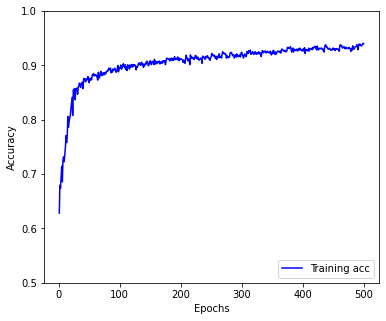

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(epochs, acc, label='Training acc', color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [ ]:
pred_test = model.predict_classes(dataX_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
test_loss, test_acc = model.evaluate(dataX_test, Y_test)

87/87 [==============================] - 0s 2ms/step - loss: 0.8536 - accuracy: 0.8750


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred_test)
print(cm)

[[1970  266]
 [  79  446]]


In [ ]:
Y_test.value_counts()

0    2236
1     525
Name: Target, dtype: int64